In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prepare
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [65]:
def Q13():
    
    df =  pd.read_csv('train_clean.csv.csv')
    df = prepare.normalize_data(df)
    df = prepare.create_number_convention(df)
    model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
    # drop
    df = df.drop(['Unnamed: 0','covid','spread'], axis=1)
    X = df
    Y = df['risk']
    X= X.drop(['risk'], axis=1)
    # X = np.float32(X)
    # Y = np.float(Y)

    # X = np.nan_to_num(X, nan=-9999, posinf=33333333, neginf=33333333)
    # Y = np.nan_to_num(Y, nan=-9999, posinf=33333333, neginf=33333333)
    model.fit(X,Y)
    plt.figure(figsize=(30, 30))
    tree.plot_tree(model,filled=True,fontsize=14,feature_names=X.columns)
    plt.title('DecisionTreeClassifier with max death 4',fontsize=30)
    plt.savefig('DecisionTreeClassifier.png',dpi=100)
    plt.show()

    predict = model.predict(X)
    risk = accuracy_score(Y, predict)
    print(risk)


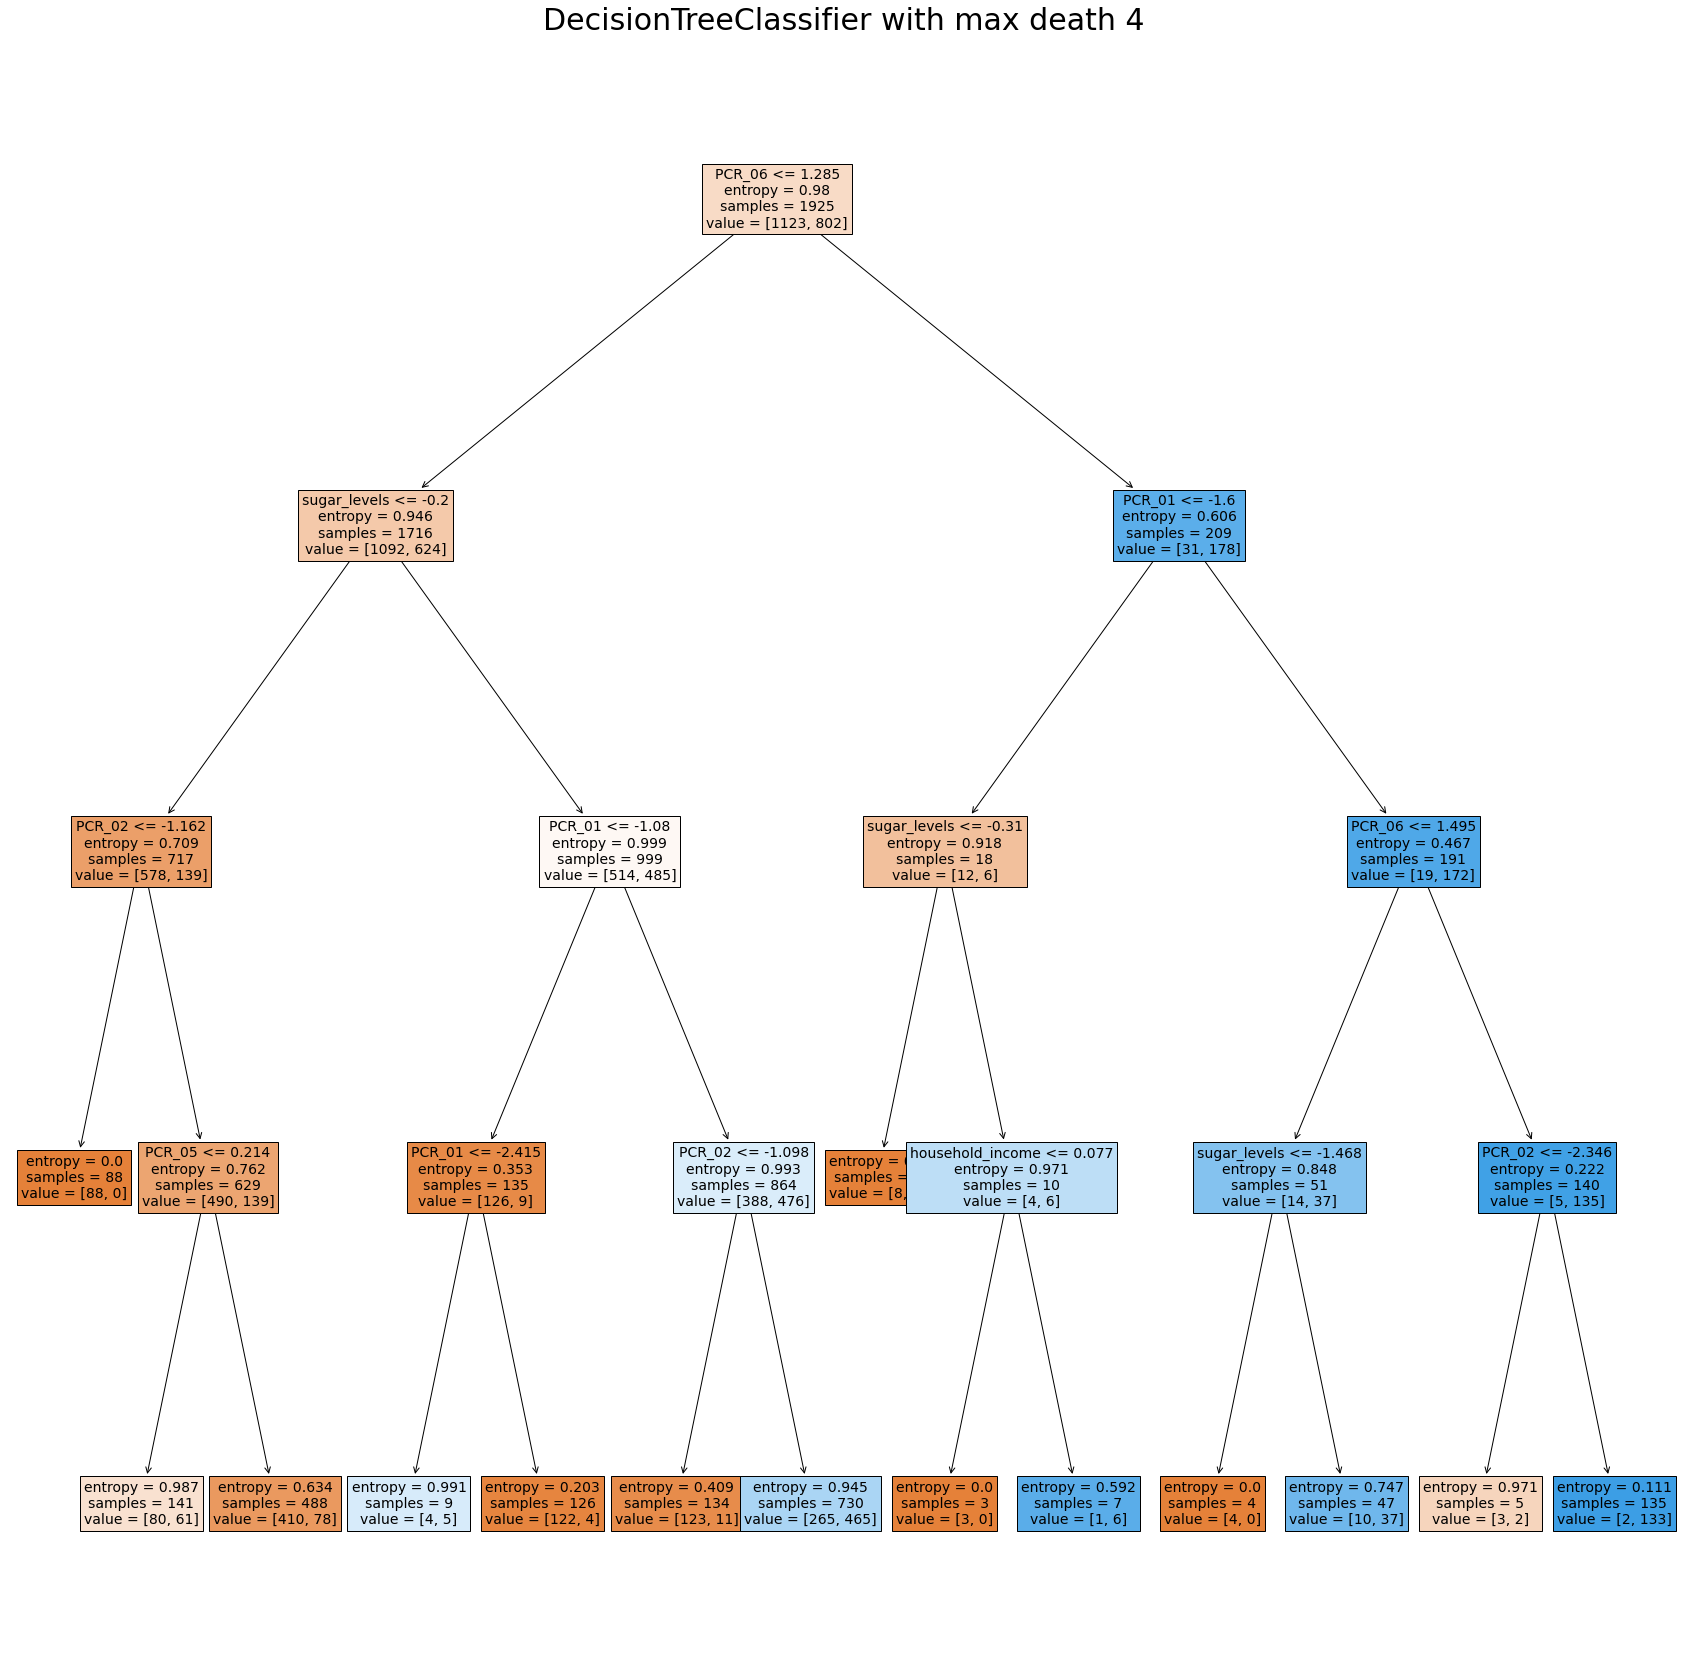

0.7724675324675324


In [66]:
Q13()